In [1]:
from pathlib import Path

train_set=Path('D:/Downloads/newDB/asl_alphabet_train/asl_alphabet_train')
test_set=Path('D:/Downloads/newDB/asl_alphabet_test/asl_alphabet_test')

# glob: used to retrieve files matching a specified pattern.
train_file_paths=list(train_set.glob(r'**/*.jpg'))
test_file_paths=list(test_set.glob(r'**/*.jpg'))

In [2]:
import pandas as pd

def getImage(fp,dset):
    
    if dset=="train":
        labels = [str(fp[i]).split("\\")[-2] \
              for i in range(len(fp))]   
    else:
        labels = [(str(fp[i]).split("\\")[-1])[0:-9] \
              for i in range(len(fp))]
    
    fp = pd.Series(fp, name='Filepath').astype(str)
    labels=pd.Series(labels,name='Label')
    
    df = pd.concat([fp, labels], axis=1)
    
    df = df.sample(frac=1,random_state=0).reset_index(drop = True)
    
    return df

train_df=getImage(train_file_paths,"train")
test_df=getImage(test_file_paths,"test")

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input,
    validation_split=0.2
)

test_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input
)

In [35]:
t=train_df.loc[80000:84000]

In [36]:
test_images = test_generator.flow_from_dataframe(
    dataframe=t,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 4001 validated image filenames belonging to 29 classes.


In [5]:
from tensorflow.keras import models
model = models.load_model('C:/Users/mihika/Desktop/minorproject/m3.h5')

In [38]:
pred = model.predict(test_images)
pred=np.argmax(pred,axis=1)

labels = (test_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

y_test = list(t.Label)

In [39]:
accuracy_score(y_test,pred)

0.9907523119220195

## Best Model: <tensorflow.python.keras.engine.functional.Functional object at 0x000001D363D0A7C8> with 99.08% accuracy on the test set

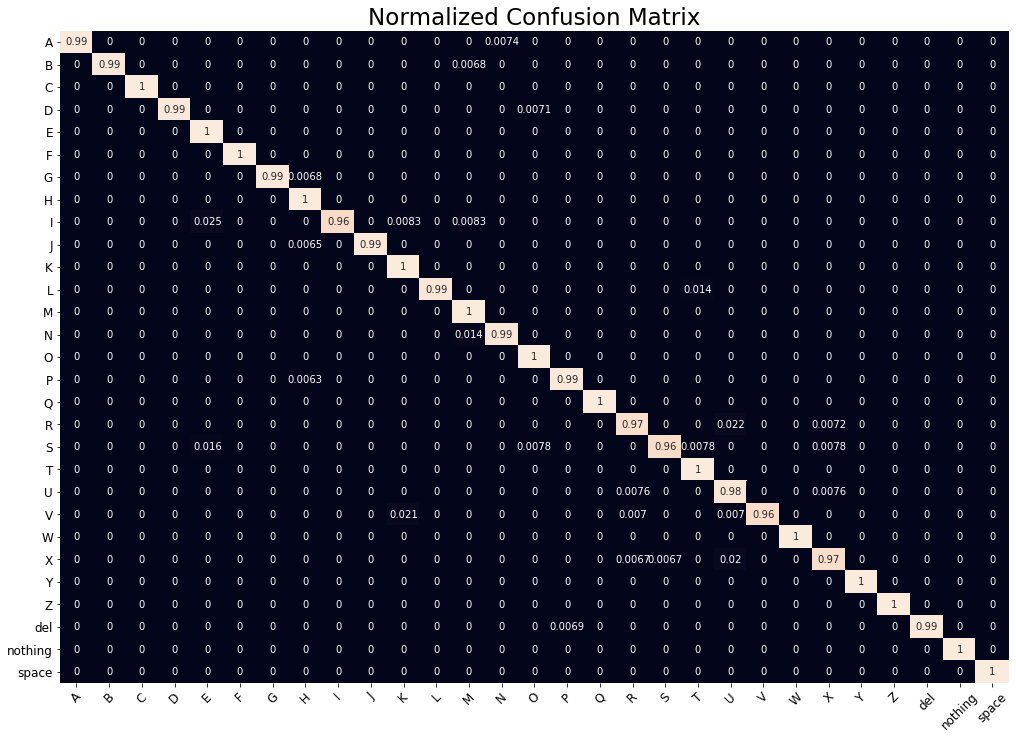

In [40]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
import seaborn as sns

def printmd(string):
    # Print with Markdowns    
    display(Markdown(string))

pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (test_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Get the accuracy on the test set
y_test = list(t.Label)
acc = accuracy_score(y_test,pred)

# Display the results
printmd(f'## Best Model: {model} with {acc*100:.2f}% accuracy on the test set')

# Display a confusion matrix
cf_matrix = confusion_matrix(y_test, pred, normalize='true')
plt.figure(figsize = (17,12))
sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)),cbar=False)
plt.title('Normalized Confusion Matrix', fontsize = 23)
plt.xticks(fontsize=12,rotation=45)
plt.yticks(fontsize=12)
plt.show()

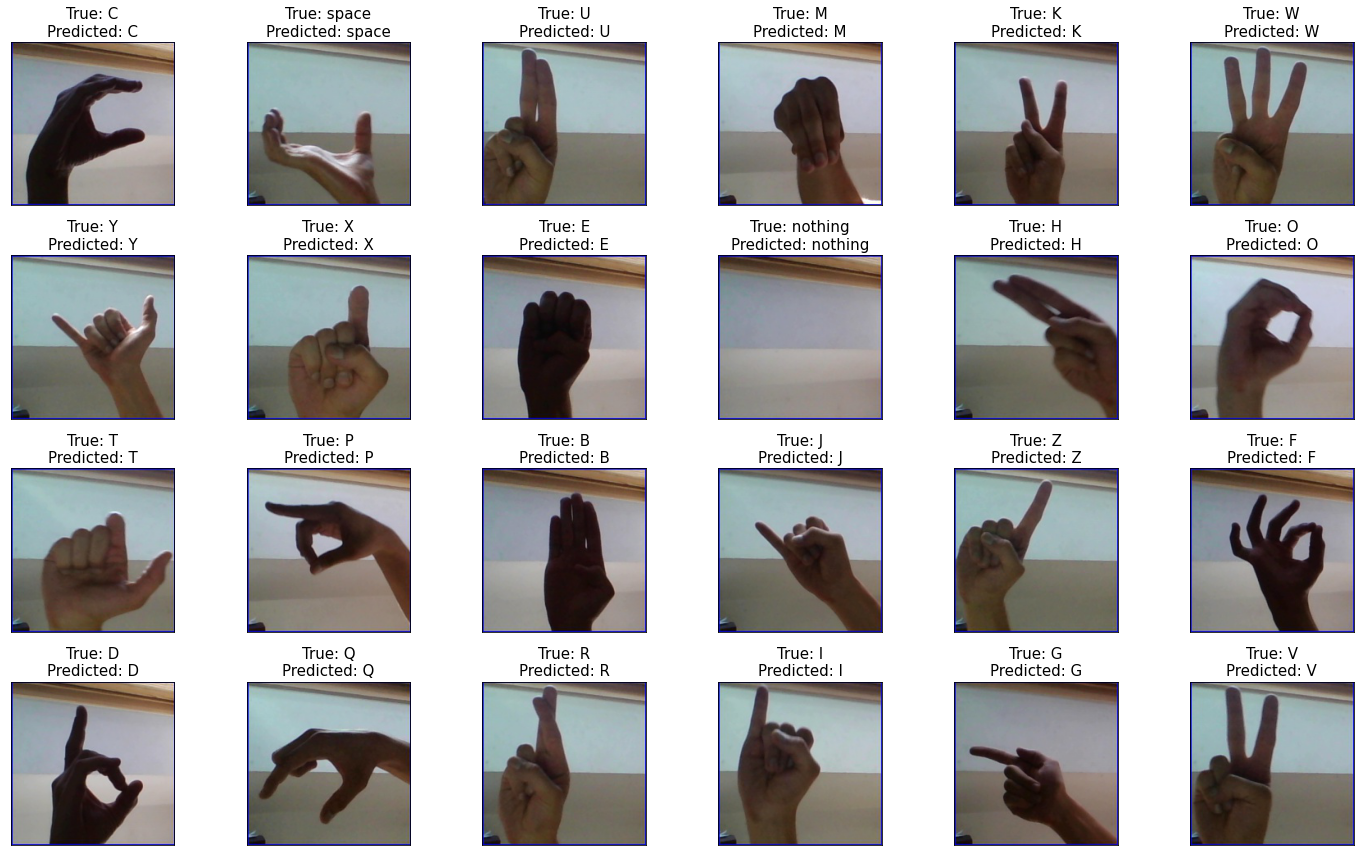

In [31]:
# Display picture of the dataset with their labels
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(20, 12),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    ax.set_title(f"True: {test_df.Label.iloc[i].split('_')[0]}\nPredicted: {pred[i].split('_')[0]}", fontsize = 15)
plt.tight_layout()
plt.show()